## Data Overview

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib.ticker as mtick
import seaborn as sns

import os
print(os.listdir("../minor project"))

['.ipynb_checkpoints', 'card.ipynb', 'chatbot_model.h5', 'chatgui.py', 'classes.pkl', 'deal.ipynb', 'dealer.ipynb', 'design.ipynb', 'emoji', 'emoji-creator-project-code', 'images_demo', 'intents.json', 'main.ipynb', 'python-project-chatbot-codes.zip', 'telecom-customer-churn-prediction.ipynb', 'train_chatbot.py', 'Untitled.ipynb', 'Untitled1.ipynb', 'WA_Fn-UseC_-Telco-Customer-Churn.csv', 'words.pkl']


In [2]:
#reading data
df = pd.read_csv('../minor project/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
#first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# total rows and columns
df.shape

(7043, 21)

In [5]:
#column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
#getting data summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
#column types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Data Preparation

In [8]:
# "TotalCharges" is numeric, but the data type is 'object'
# It needs to be converted to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
#changing vlues of SeniorCitizen from 0 and 1 to Yes and No
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [10]:
# Checking the number of missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# There are 11 missing records in 'TotalCharges'. We will drop these missing records
# Dropping the missing records
df.dropna(inplace=True)

In [12]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [13]:
# Dropping 'customerID' column
df.drop('customerID', axis=1, inplace=True)

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
# Converting target variable to binary number
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## EDA

In [17]:
#converting all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


### 1. Correlation

<AxesSubplot:>

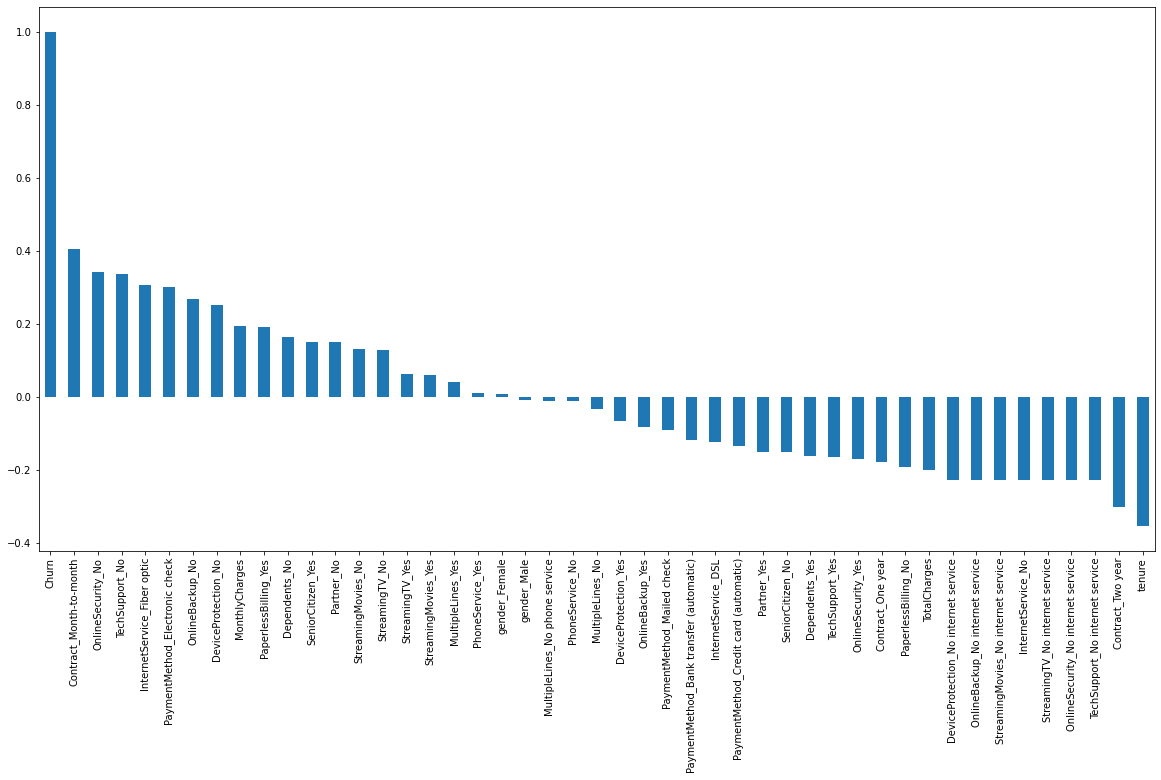

In [18]:
# correlation of Churn with other variables
plt.figure(figsize=(20,10))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [19]:
#correlation matrix
corr = df_dummies.corr()
corr.style.background_gradient(cmap='coolwarm')

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
tenure,1.000000,0.246862,0.825880,-0.354049,-0.005285,0.005285,-0.015683,0.015683,-0.381912,0.381912,-0.163386,0.163386,-0.007877,0.007877,-0.323891,-0.007877,0.332399,0.013786,0.017930,-0.037529,-0.265987,-0.037529,0.328297,-0.314769,-0.037529,0.361138,-0.314820,-0.037529,0.361520,-0.264363,-0.037529,0.325288,-0.246814,-0.037529,0.280264,-0.252890,-0.037529,0.285402,-0.649346,0.202338,0.563801,-0.004823,0.004823,0.243822,0.232800,-0.210197,-0.232181
MonthlyCharges,0.246862,1.000000,0.651065,0.192858,0.013779,-0.013779,-0.219874,0.219874,-0.097825,0.097825,0.112343,-0.112343,-0.248033,0.248033,-0.338514,-0.248033,0.490912,-0.161368,0.787195,-0.763191,0.360220,-0.763191,0.296447,0.210126,-0.763191,0.441529,0.171057,-0.763191,0.482607,0.321267,-0.763191,0.338301,0.016015,-0.763191,0.629668,0.017271,-0.763191,0.627235,0.058933,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568
TotalCharges,0.825880,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.102411,0.102411,-0.319072,0.319072,-0.064653,0.064653,-0.113008,0.113008,-0.396765,-0.113008,0.469042,-0.052190,0.360769,-0.374878,-0.064515,-0.374878,0.412619,-0.177633,-0.374878,0.510100,-0.189485,-0.374878,0.522881,-0.084270,-0.374878,0.432868,-0.197144,-0.374878,0.515709,-0.202605,-0.374878,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
Churn,-0.354049,0.192858,-0.199484,1.000000,0.008545,-0.008545,-0.150541,0.150541,0.149982,-0.149982,0.163128,-0.163128,-0.011691,0.011691,-0.032654,-0.011691,0.040033,-0.124141,0.307463,-0.227578,0.342235,-0.227578,-0.171270,0.267595,-0.227578,-0.082307,0.252056,-0.227578,-0.066193,0.336877,-0.227578,-0.164716,0.128435,-0.227578,0.063254,0.130920,-0.227578,0.060860,0.404565,-0.178225,-0.301552,-0.191454,0.191454,-0.118136,-0.134687,0.301455,-0.090773
gender_Female,-0.005285,0.013779,-0.000048,0.008545,1.000000,-1.000000,-0.001819,0.001819,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,-0.007515,0.008883,-0.007584,0.011189,-0.004745,-0.010859,-0.004745,0.016328,-0.008605,-0.004745,0.013093,0.003163,-0.004745,0.000807,-0.003815,-0.004745,0.008507,-0.003088,-0.004745,0.007124,-0.006078,-0.004745,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199
gender_Male,0.005285,-0.013779,0.000048,-0.008545,-1.000000,1.000000,0.001819,-0.001819,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,0.007515,-0.008883,0.007584,-0.011189,0.004745,0.010859,0.004745,-0.016328,0.008605,0.004745,-0.013093,-0.003163,0.004745,-0.000807,0.003815,0.004745,-0.008507,0.003088,0.004745,-0.007124,0.006078,0.004745,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199
SeniorCitizen_No,-0.015683,-0.219874,-0.102411,-0.150541,-0.001819,0.001819,1.000000,-1.000000,0.016957,-0.016957,-0.210550,0.210550,0.008392,-0.008392,0.136377,0.008392,-0.142996,0.108276,-0.254923,0.182519,-0.185145,0.182519,0.038576,-0.087539,0.182519,-0.066663,-0.094403,0.

### 2. Churns Distribution

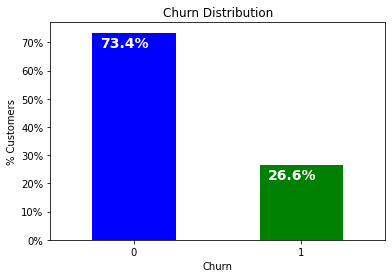

In [20]:
colors = ['blue','green']
val = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0,color = colors)
val.yaxis.set_major_formatter(mtick.PercentFormatter())
val.set_ylabel('% Customers')
val.set_xlabel('Churn')
val.set_title('Churn Distribution')

totals = []

for i in val.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in val.patches:
    val.text(i.get_x()+.05, i.get_height()-5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=14,
            color='white',
           weight = 'bold')

Looking at the distribution of the target variable, it can be found that 74% records for non-churn customers and 26 % of records are for churn customers.

### 3. Gender

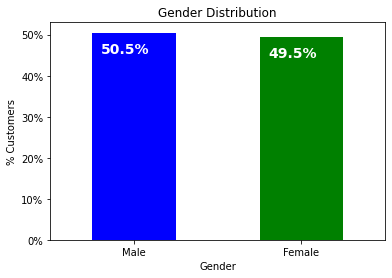

In [21]:
colors = ['blue','green']
val = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                       stacked = True,rot = 0,color = colors)
val.yaxis.set_major_formatter(mtick.PercentFormatter())
val.set_ylabel('% Customers')
val.set_xlabel('Gender')
val.set_ylabel('% Customers')
val.set_title('Gender Distribution')

totals = []

for i in val.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in val.patches:
    val.text(i.get_x()+.05, i.get_height()-5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=14,
            color='white',
           weight = 'bold')

### 4. Senior Citizens

Text(0.5, 1.0, '% of Senior Citizens')

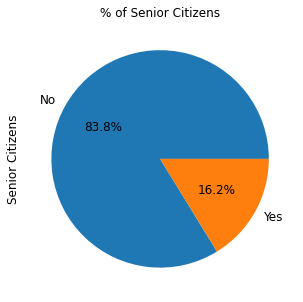

In [22]:
val = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
val.yaxis.set_major_formatter(mtick.PercentFormatter())
val.set_ylabel('Senior Citizens',fontsize = 12)
val.set_title('% of Senior Citizens', fontsize = 12)

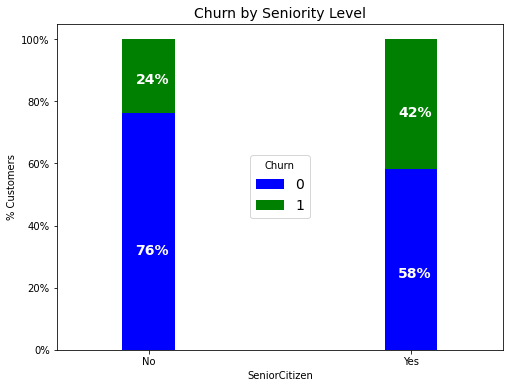

In [23]:
colors = ['blue','green']
senior_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

val = (senior_churn.T*100.0 / senior_churn.T.sum()).T.plot(kind='bar', width = 0.2,stacked = True, rot = 0,  figsize = (8,6),color = colors)
val.yaxis.set_major_formatter(mtick.PercentFormatter())
val.legend(loc='center',prop={'size':14},title = 'Churn')
val.set_ylabel('% Customers')
val.set_title('Churn by Seniority Level',size = 14)

for i in val.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    val.annotate('{:.0f}%'.format(height), (i.get_x()+.25*width, i.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

### 5. Dependents and Partners

#### 5.1 Dependents & Churn

In [24]:
pd.crosstab(df['Churn'], df['Dependents'],margins = True)

Dependents,No,Yes,All
Churn,,,
0,3390,1773,5163
1,1543,326,1869
All,4933,2099,7032


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


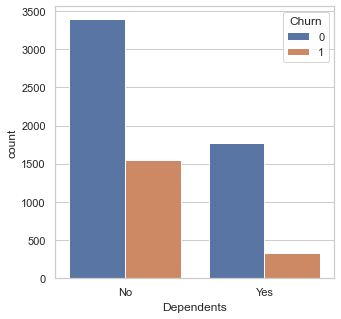

In [25]:
plt.figure(figsize = (5,5))
sns.set(style = 'whitegrid')
sns.countplot(df['Dependents'], hue=df['Churn'])
plt.show()

#### Churn rate is higher in customers who don't have dependents

#### 5.2 Dependents & Partner

In [26]:
pd.crosstab(df['Dependents'], df['Partner'],margins = True)

Partner,No,Yes,All
Dependents,,,
No,3280,1653,4933
Yes,359,1740,2099
All,3639,3393,7032


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


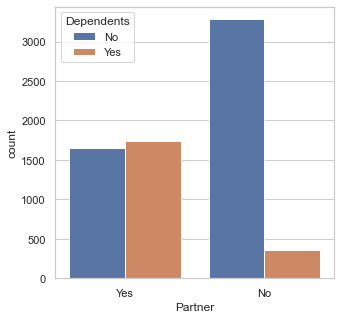

In [27]:
plt.figure(figsize = (5,5))
sns.set(style = 'whitegrid')
sns.countplot(df['Partner'], hue=df['Dependents'])
plt.show()

#### 5.3. Partner and Churn

In [28]:
pd.crosstab(df['Partner'], df['Churn'],margins = True)

Churn,0,1,All
Partner,,,
No,2439,1200,3639
Yes,2724,669,3393
All,5163,1869,7032


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


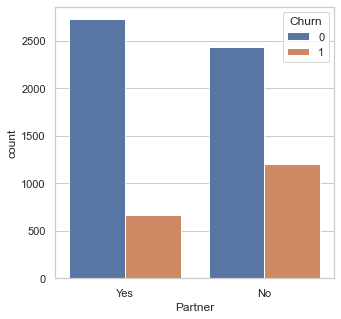

In [29]:
plt.figure(figsize = (5,5))
sns.set(style = 'whitegrid')
sns.countplot(df['Partner'], hue=df['Churn'])
plt.show()

Churn rate is higher for customers having no partners

### 7. Billing

In [30]:
pd.crosstab(df['PaperlessBilling'], df['Churn'],margins = True)

Churn,0,1,All
PaperlessBilling,,,
No,2395,469,2864
Yes,2768,1400,4168
All,5163,1869,7032


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


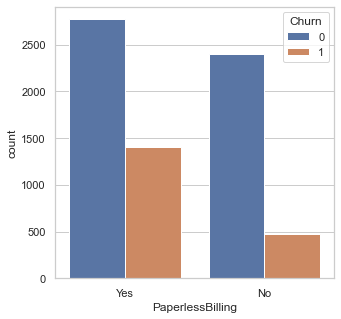

In [31]:
plt.figure(figsize = (5,5))
sns.set(style = 'whitegrid')
sns.countplot(df['PaperlessBilling'], hue=df['Churn'])
plt.show()

### 8. Contract Type

<AxesSubplot:>

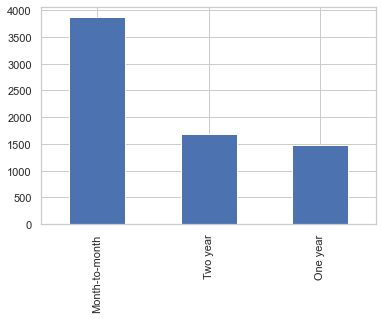

In [32]:
df['Contract'].value_counts().plot(kind='bar')

In [33]:
pd.crosstab(df['Contract'], df['Churn'],margins = True)

Churn,0,1,All
Contract,,,
Month-to-month,2220,1655,3875
One year,1306,166,1472
Two year,1637,48,1685
All,5163,1869,7032


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


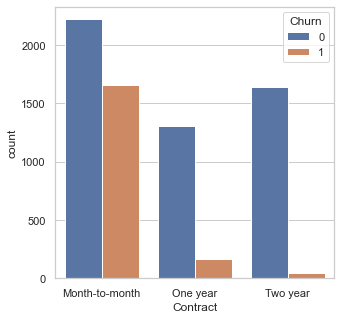

In [34]:
plt.figure(figsize = (5,5))
sns.set(style = 'whitegrid')
sns.countplot(df['Contract'], hue=df['Churn'])
plt.show()

#### 8.1 Contract & Dependent

In [35]:
pd.crosstab(df['Contract'], df['Dependents'],margins = True)

Dependents,No,Yes,All
Contract,,,
Month-to-month,3086,789,3875
One year,942,530,1472
Two year,905,780,1685
All,4933,2099,7032


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


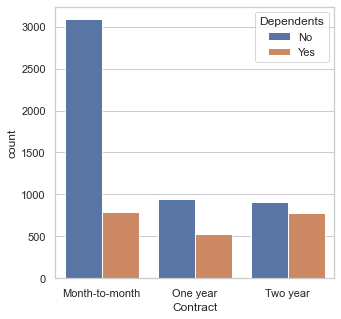

In [36]:
plt.figure(figsize = (5,5))
sns.set(style = 'whitegrid')
sns.countplot(df['Contract'], hue=df['Dependents'])
plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Two Year Contract')

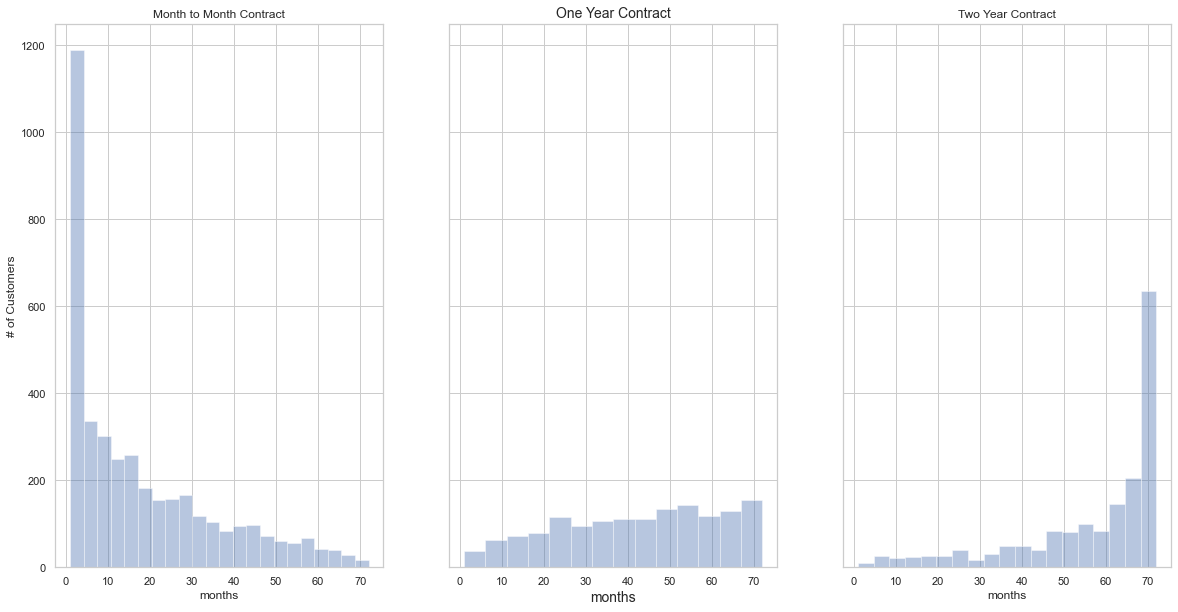

In [37]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,10))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True,kde=False, ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('months')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,ax=ax2)
ax.set_xlabel('months',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,ax=ax3)

ax.set_xlabel('months')
ax.set_title('Two Year Contract')

## Modeling

In [38]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
    
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr_para = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
lr = GridSearchCV(estimator=LogisticRegression(), param_grid=lr_para, scoring='accuracy', n_jobs=-1, cv=10)
lr.fit(X_train_std, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
y_lr_pred = lr.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_lr_pred))
print(confusion_matrix(y_test, y_lr_pred))
print(classification_report(y_test,y_lr_pred))
print('Best Params:',lr.best_params_)
print('Best score:', lr.best_score_)

Accuracy: 0.8019
[[1393  162]
 [ 256  299]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.65      0.54      0.59       555

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110

Best Params: {'C': 100.0, 'penalty': 'l2'}
Best score: 0.8063721367436797


In [46]:
lr.best_estimator_.get_params()

{'C': 100.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [47]:
lr_plot = LogisticRegression(penalty='l2', dual=False, tol=0.0001, 
                             C=10.0, fit_intercept=True, intercept_scaling=1, 
                             class_weight=None, random_state=None,
                             max_iter=100,verbose=0, 
                             warm_start=False, n_jobs=None)

In [48]:
lr_plot.fit(X_train_std, y_train)

LogisticRegression(C=10.0)

In [49]:
y_lr_plot_pred = lr_plot.predict(X_test_std)

In [50]:
print('Accuracy: %.4f' % accuracy_score(y_test, y_lr_plot_pred))

Accuracy: 0.8014


<AxesSubplot:title={'center':'Top 10 Weights of Variables'}>

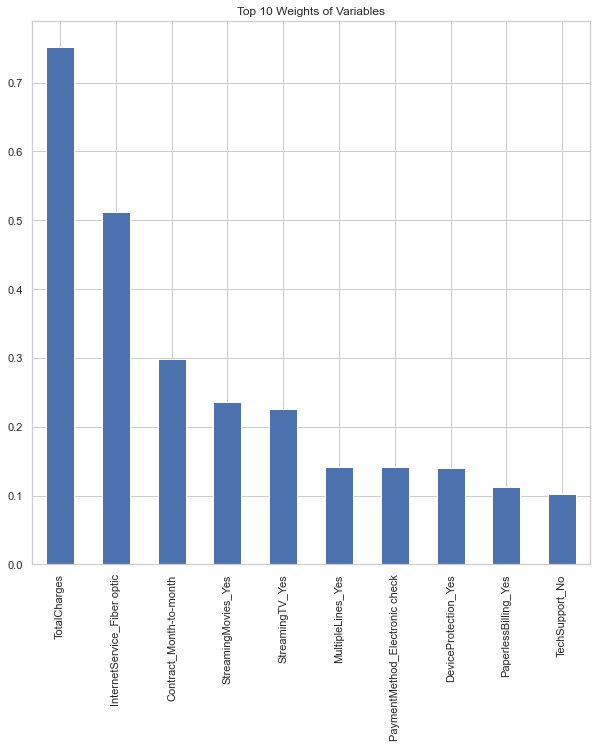

In [51]:
plt.figure(figsize=(10,10))
plt.title('Top 10 Weights of Variables')
weights = pd.Series(lr_plot.coef_[0],
                 index=X.columns.values)
weights.sort_values(ascending = False)[:10].plot(kind='bar')


<AxesSubplot:title={'center':'Least 10 Weights of Variables'}>

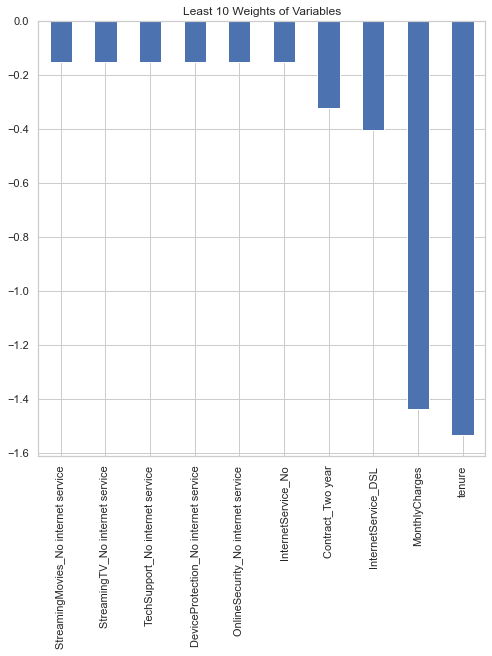

In [52]:
plt.figure(figsize=(8,8))
plt.title('Least 10 Weights of Variables')
weights.sort_values(ascending = False)[-10:].plot(kind='bar')

In [53]:
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


AUC: 0.84


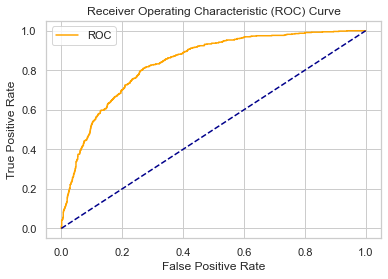

In [54]:

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

probs = lr.predict_proba(X_test_std)
probs=probs[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

### Support Vector Machine

In [55]:
from sklearn.svm import SVC

In [56]:
svm = SVC(kernel='linear') 
svm.fit(X_train_std,y_train)

SVC(kernel='linear')

In [66]:
y_svm_pred = svm.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_svm_pred))
print(confusion_matrix(y_test, y_svm_pred))
print(classification_report(y_test,y_svm_pred))

Accuracy: 0.8019
[[1397  158]
 [ 260  295]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.65      0.53      0.59       555

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.80      2110



### Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
clf_param = {'max_depth':np.arange(1, 49),
             'criterion': ['gini', 'entropy']
            }
clf = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=clf_param, 
                   scoring='accuracy', n_jobs=-1, cv=10)

In [60]:
clf.fit(X_train_std, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])},
             scoring='accuracy')

In [67]:
y_clf_pred = clf.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_clf_pred))
print(confusion_matrix(y_test, y_clf_pred))
print(classification_report(y_test,y_clf_pred))
print('Best score:', clf.best_score_)

Accuracy: 0.7839
[[1370  185]
 [ 271  284]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1555
           1       0.61      0.51      0.55       555

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.77      0.78      0.78      2110

Best score: 0.7925547090156501


In [68]:
clf.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rfl = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)

In [71]:
rfl.fit(X_train_std, y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

In [72]:
y_rfl_pred = rfl.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_rfl_pred))
print(confusion_matrix(y_test, y_rfl_pred))
print(classification_report(y_test,y_rfl_pred))

Accuracy: 0.7924
[[1423  132]
 [ 306  249]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1555
           1       0.65      0.45      0.53       555

    accuracy                           0.79      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110



In [73]:
rfl_plot = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=1500,
                                 max_features=3, max_leaf_nodes=None,min_impurity_decrease=0.0,
                                 min_impurity_split=None, min_samples_leaf=3, min_samples_split=8,
                                 min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None, random_state=None,
                                 verbose=0, warm_start=False)
rfl_plot.fit(X_train_std, y_train)

RandomForestClassifier(max_depth=1500, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=80)

In [74]:
importances = rfl_plot.feature_importances_ 
indices = np.argsort(importances)[::-1]
feat_labels = df_dummies.columns[1:]

for f in range(X_train_std.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) MonthlyCharges                 0.145004
 2) Churn                          0.127956
 3) TotalCharges                   0.086724
 4) Contract_Month-to-month        0.056502
 5) PaymentMethod_Electronic check 0.041512
 6) OnlineSecurity_No              0.041403
 7) Contract_Two year              0.038010
 8) InternetService_Fiber optic    0.034408
 9) InternetService_DSL            0.026170
10) OnlineBackup_No                0.023224
11) TechSupport_No                 0.022693
12) PaperlessBilling_Yes           0.020497
13) Contract_One year              0.020284
14) PaperlessBilling_No            0.016555
15) TechSupport_Yes                0.014739
16) OnlineSecurity_Yes             0.013296
17) SeniorCitizen_Yes              0.012270
18) OnlineBackup_Yes               0.012227
19) SeniorCitizen_No               0.012093
20) DeviceProtection_No            0.012023
21) gender_Male                    0.011269
22) Partner_Yes                    0.011256
23) gender_Female               

<AxesSubplot:title={'center':'Top 10 Important Variables (Random Forest)'}>

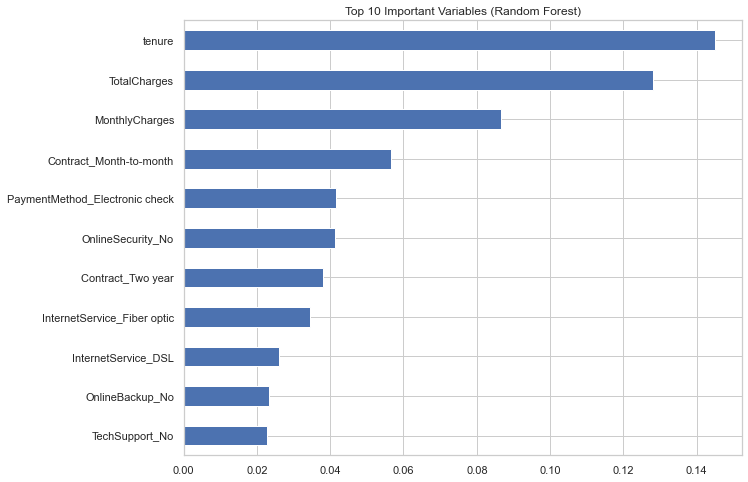

In [75]:
plt.figure(figsize=(10,8))
plt.title('Top 10 Important Variables (Random Forest)')
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-11:].plot(kind = 'barh')

### Gradient Boosting

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_std, y_train)

GradientBoostingClassifier()

In [85]:
y_gbc_pred = gbc.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_gbc_pred))
print(confusion_matrix(y_test, y_gbc_pred))
print(classification_report(y_test,y_gbc_pred))

Accuracy: 0.8019
[[1408  147]
 [ 271  284]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1555
           1       0.66      0.51      0.58       555

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



#### XGBoost

In [80]:
from xgboost import XGBClassifier

In [81]:
xgb = XGBClassifier()

In [82]:
xgb.fit(X_train_std, y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:27:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
y_xgb_pred = xgb.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_xgb_pred))
print(confusion_matrix(y_test, y_xgb_pred))
print(classification_report(y_test,y_xgb_pred))


Accuracy: 0.7815
[[1372  183]
 [ 278  277]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1555
           1       0.60      0.50      0.55       555

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



### Conclusion